# Support Vector Machines (SVM)

Un Support Vector Machines (SVM) est un modèle de machine learning très puissant et polyvalent, capable d’effectuer une classification linéaire ou non linéaire, une régression et même une détection des outliers. C’est l’un des modèles les plus populaires de l’apprentissage automatique et toute personne intéressée par l’apprentissage automatique devrait l’avoir dans sa boîte à outils. Dans cet article, nous ferons une introduction aux SVM et implémenterons un SVM en python.

# Support Vector Machines a.k.a. SVM, Kezako ?

Comme présenté en introduction, le SVM est un modèle d’apprentissage automatique supervisé qui est principalement utilisé pour les classifications (mais il peut aussi être utilisé pour la régression !). L’intuition derrière les Support Vector Machines est de simplement séparer des données en les délimitant (créer des frontières ) afin de créer des groupes.

En d’autres termes, les SVM visent à résoudre les problèmes de classification en trouvant de bonnes frontières de décision (voir figure ci-dessous) entre deux ensembles de points appartenant à deux catégories différentes. Une frontière de décision peut être considérée comme une ligne ou une surface séparant vos données d’apprentissage en deux espaces correspondant à deux catégories. Pour classer de nouveaux points de données, il suffit de vérifier de quel côté de la frontière de décision ils se trouvent.

Les SVM procèdent à la recherche de ces frontières en deux étapes :

1- Les données sont mises en correspondance avec une nouvelle représentation à haute dimension où la frontière de décision peut être exprimée sous la forme d’un hyperplan (si les données étaient bidimensionnelles, comme dans la figure ci-dessous, un hyperplan serait une ligne droite).

2- Une bonne limite de décision (un hyperplan de séparation) est calculée en essayant de maximiser la distance entre l’hyperplan et les points de données les plus proches de chaque classe, une étape appelée maximisation de la marge. Cela permet à la frontière de bien s’adapter à de nouveaux échantillons en dehors de l’ensemble de données d’apprentissage.

Cette technique utilisée par les Support Vector Machines est appelée “kernel trick“. Elle permet de transformer les données, puis, sur la base de ces transformations, il trouve une limite optimale entre les résultats possibles. En d’autres termes, il effectue des transformations de données extrêmement complexes, puis détermine comment séparer les données en fonction des labels que vous avez définis.

# Les SVM en python

On importe le dataset que nous utiliserons dans ce tutoriel.

In [2]:
#Import du data set et des libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#chargement du jeu de donnees
wine_dataset = datasets.load_wine()

# Exploration des données

Après avoir importé notre jeu de données, nous allons essayer de l’explorer et le visualiser afin d’avoir le maximum d’informations pour notre modélisation

In [3]:
#On a un dictionnaire python  dont les différentes clés sont
# 'data', 'target', 'target_names', 'DESCR', 'feature_names'
print(wine_dataset.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [4]:
# les features
print("Features: ", wine_dataset.feature_names)


Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


On voit donc qu’on a 3 labels ce qui pourrait dire qu’on a affaire à différentes catégories de vin. Allez, transformons tout ça en un dataFrame Pandas.

In [5]:
wine_dataframe = pd.DataFrame(data=wine_dataset['data'],columns=wine_dataset['feature_names'])
#On ajoute la colonne target ensuite
wine_dataframe['target'] = wine_dataset['target']
# Puis le nom des targets
wine_dataframe['class']=wine_dataframe['target'].map(lambda target_name: wine_dataset['target_names'][target_name])


À ce niveau on peut faire un head() et un describe() pour mieux appréhender le dataFrame que nous venons de créer.

In [6]:
wine_dataframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Un peu de visualisation…

Le describe() nous montre que la moyenne d’alcool contenu dans les vins est d’envrion 13%. Essayons de visualiser la distribution d’alcool pour chaque catégorie de vin.

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

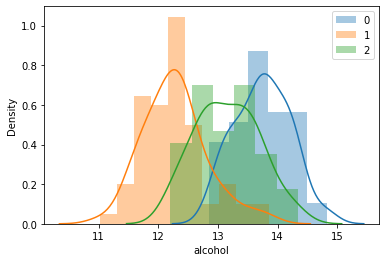

In [7]:
for i in wine_dataframe.target.unique():
    sns.distplot(wine_dataframe['alcohol'][wine_dataframe.target==i],
                 kde=1,label='{}'.format(i))
 
plt.legend()

On s’aperçoit que les distributions semblent plutôt normales et peuvent être classées en 3 groupes. Les vins faibles en teneur d’alcool, les vins à teneur d’alcool moyenne et les vins forts. On peut s’amuser à analyser d’autres caractéristiques, mais notre objectif dans ce tutoriel est de montrer l’utilisation du SVM.

# Création de notre modèle SVM

In [8]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = \
    train_test_split(wine_dataset['data'],wine_dataset['target'],
                     test_size=0.2)

Nous pouvons dès à présent créer notre SVM dans sklearn cela consiste à créer un objet SVC (support vector classificator). L’un des paramètres importants est le noyau ‘kernel’, comme présenté plus haut, c’est une fonction qui sert à transformer les données dans une représentation spécifique.
Les SVM utilisent différents types de fonctions noyau. Ces fonctions sont de différents types, par exemple, linéaire, non linéaire, polynomiale, fonction de base radiale (RBF) et sigmoïde.
Il faut donc avoir une attention particulière sur ce paramètre. Je vous laisse la documentation de scikit-learn sur les kernel pour mieux approfondir ce point.
Dans notre cas nous choisirons un kernel linéaire (pourquoi 😉 )

In [9]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



On regarde (ci-dessus) le rapport de classification pour voir ce que ça donne. Et ça semble pas mal.

# Conclusion

Dans cet article nous avons présenté les Support Vector Machines qui sont des modèles très intéressants dont les principaux points forts sont les suivants :

* L’efficacité dans les espaces à dimension élevés
* L’efficacité dans les cas où le nombre de dimensions est supérieur au nombre d’échantillons.
* L’utilisation d’un sous-ensemble de points d’apprentissage dans la fonction de décision (appelés vecteurs de support), ce qui la rend également efficace en termes de mémoire.
* La polyvalence/ flexibilité : différentes fonctions de noyau peuvent être spécifiées pour la fonction de décision.

Cependant, il faut faire attention au cas particulier où le nombre de ” features ” est beaucoup plus grand que le nombre d’échantillons, car un mauvais le choix des fonctions de noyau peut entrainer l’over-fitting.